In [32]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [33]:
#importando dados

In [34]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923111,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-05,79.625999,79.055000,79.100998,79.073997,78.798000,78.490100,76.481368,74.379634
2021-01-06,80.421997,79.531998,79.719002,79.719002,78.953101,78.618650,76.515258,74.448389
2021-01-07,80.556999,80.150002,80.516998,80.510002,79.156100,78.768950,76.558058,74.524294


In [35]:
#ativo = round(ativo*1000)

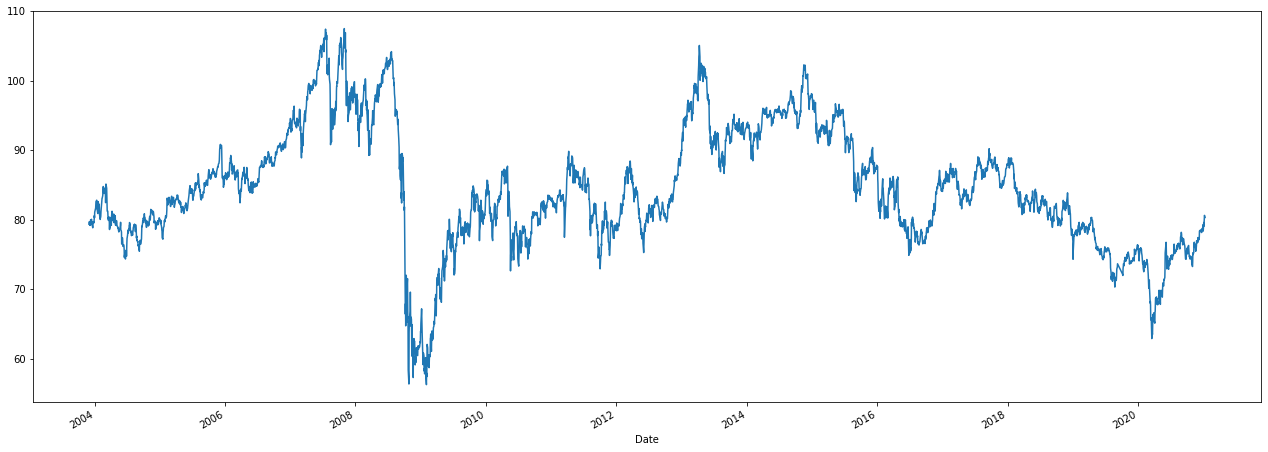

In [36]:
ativo['Close'].plot(figsize=(22,8))

In [37]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [38]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [39]:
ativo = ativo.dropna()
#ativo['MM10'] = ativo['Close'] - ativo['MM10']
#ativo['MM20'] = ativo['Close'] - ativo['MM20']
#ativo['MM100'] = ativo['Close'] - ativo['MM100']
#ativo['MM200'] = ativo['Close'] - ativo['MM200']
#ativo['Close'] = ativo['Close'] / ativo['Open']
#ativo['Low'] = ativo['Low'] / ativo['Open']
#ativo['High'] = ativo['High'] / ativo['Open']
#ativo['Open'] = ativo['Open'] / ativo['Open']
#ativo

In [40]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [42]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [45]:
print(precisao)
print(matriz)

0.5
[[151 161]
 [157 167]]


In [46]:
# Conclusão: 50%
#Péssimo